# **Importing Libraries:**

In [3]:
# Libraries for Data Manipulation
import numpy as np
import pandas as pd


# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')


# Libraries to Handle Machine Learning Models
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


# Model Evaluation Metrics
from sklearn.metrics import (
    f1_score,
    recall_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    classification_report,
)

# **Loading data**

In [4]:
x_train_scaled = pd.read_csv('./DATASET/EDA-DATASET/x_train_scaled.csv')
x_test_scaled = pd.read_csv('./DATASET/EDA-DATASET/x_test_scaled.csv')
y_train = pd.read_csv('./DATASET/EDA-DATASET/y_train.csv')
y_test = pd.read_csv('./DATASET/EDA-DATASET/y_test.csv')

### **Function to evaluate model**

In [ ]:
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = accuracy_score(
        y_test, 
        y_pred
    )
    
    precision = precision_score(
        y_test, 
        y_pred, 
        average='weighted'
    )
    
    recall = recall_score(
        y_test, 
        y_pred, 
        average='weighted'
    ) 
    
    f1 = f1_score(
        y_test, 
        y_pred, 
        average='weighted'
    ) 
    
    conf_matrix = confusion_matrix(
        y_test, 
        y_pred
    ) 
    
    class_report = classification_report(
        y_test, 
        y_pred
    ) 
    
    roc_auc = roc_auc_score(
        y_test, 
        y_prob, 
        multi_class='ovr', 
        average='weighted'
    )
    
     
    
    return accuracy, precision, recall, f1, conf_matrix, class_report, roc_auc

# **Hyper-Parameter Tuning Setups**

### **Parameter grid for K-Nearest Neighbors (KNN)**

In [ ]:
param_grid_knn = {
    # 'n_neighbors': Number of neighbors considered for prediction. 
    # Try 3 and 5 to see which number of neighbors yields better performance.
    'n_neighbors': [3, 5],
    
    
    # 'weights': Determine the influence of each neighbor on the prediction.
    # 'uniform' gives equal weight to all neighbors, regardless of distance.
    'weights': ['uniform'],
    
    
    # 'metric': Distance metric to measure closeness of neighbors.
    # Using 'euclidean' for straight-line (L2) distance.
    'metric': ['euclidean']
}

## **Perform GridSearchCV for KNN**

In [7]:
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),  # KNeighborsClassifier as the model
    param_grid=param_grid_knn,         # Parameter grid defined earlier for KNN
    cv=2,                              # 2-fold cross-validation to split the training data for evaluation
    scoring='accuracy',                # Accuracy as the evaluation metric
    verbose=1,                         # Set verbosity level to show progress of the grid search
    n_jobs=-1                          # Use all available CPU cores to parallelize the computation
)



# Fit the grid search to the training data to find the best hyperparameters
grid_search_knn.fit(x_train_scaled, y_train)



# Saving the best KNN model with the optimal hyperparameters found
best_knn_model = grid_search_knn.best_estimator_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


## **Running Predictions and Evaluation**

- **Predicting the class labels and probabilities using KNN model**

In [8]:
# Class labels
y_pred_knn = best_knn_model.predict(x_test_scaled)  


# Class probabilities
y_prob_knn = best_knn_model.predict_proba(x_test_scaled)  


# Evaluating the KNN model using various metrics defined above
accuracy_knn, precision_knn, recall_knn, f1_knn, conf_matrix_knn, class_report_knn, roc_auc_knn = evaluate_model(y_test, y_pred_knn, y_prob_knn)

## **Confusion Matrix**

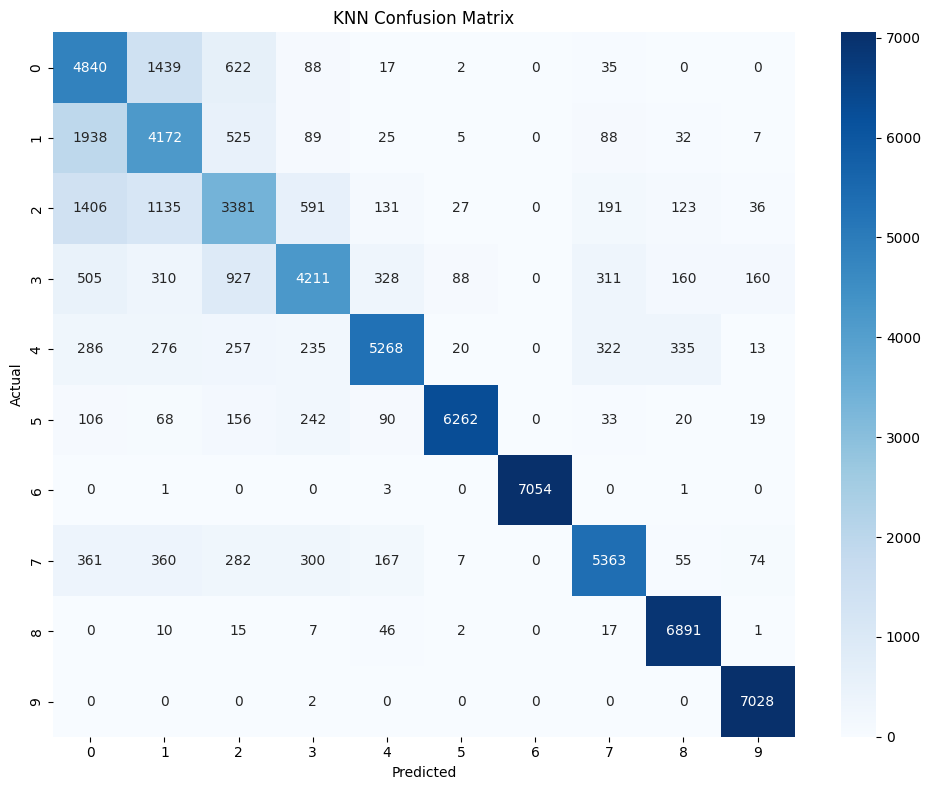

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))


sns.heatmap(
    conf_matrix_knn,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=ax
)


ax.set_title('KNN Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


plt.tight_layout()
plt.show()

## **ROC-AUC Curves**

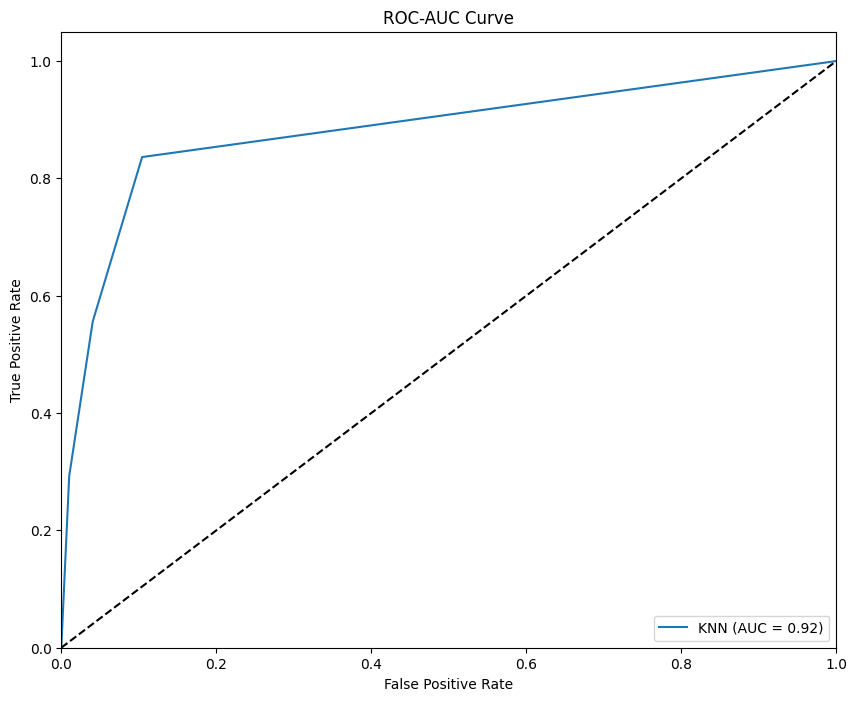

In [ ]:
plt.figure(figsize=(10, 8))


# Computing the false positive rate (fpr) and true positive rate (tpr) for KNN and Random Forest models
# '[:, 1]' selects the probability for the positive class (class 1 in binary classification)
fpr_knn, tpr_knn, _ = roc_curve(
    y_test,
    y_prob_knn[:, 1],
    pos_label=1
)


# ROC curve for KNN model
plt.plot(
    fpr_knn,
    tpr_knn,
    label='KNN (AUC = {:.2f})'.format(roc_auc_knn)
)


# Plot a diagonal line representing a random classifier (50% chance)
# 'k--' == means black dashed line
plt.plot([0, 1], [0, 1], 'k--')  


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')


plt.legend(loc='lower right')


plt.show()

## **Model Summary Table**

In [14]:
summary = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [accuracy_knn],
    'Precision': [precision_knn],
    'Recall': [recall_knn],
    'F1 Score': [f1_knn],
    'ROC-AUC': [roc_auc_knn]
})


print("Model Comparison Summary:")
print(summary)

Model Comparison Summary:
  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0   KNN  0.778143    0.78816  0.778143  0.779845  0.921793
